In [5]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

#lines 7 and 8 make the code run on Kolton's laptop
import os
os.environ["PROJ_LIB"] ="C:/Users/kolto/Anaconda3/Library/share"; #fixr

from mpl_toolkits.basemap import Basemap

In [8]:
# Load in hurricane data
atlantic = np.load("../Data/atlantic_series.pickle",allow_pickle=True)
pacific = np.load("../Data/pacific_series.pickle",allow_pickle=True)

In [10]:
# Getting indices of longest hurricanes, for a more interesting plot

at_lens = []
for a in atlantic:
    at_lens.append(len(a))

a_longest = np.where(np.array(at_lens) > 77)[0]

pc_lens = []
for p in pacific:
    pc_lens.append(len(p))

p_longest = np.where(np.array(pc_lens) > 70)[0]

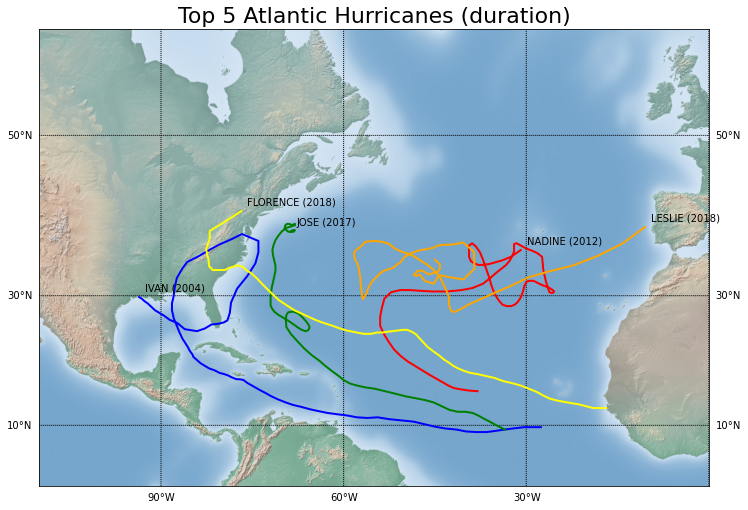

In [16]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))

# Set up the map and the longitude-latitude window
m = Basemap(llcrnrlon=-110.,llcrnrlat=0.,urcrnrlon=0.,urcrnrlat=60.,
            rsphere=(6378137.00,6356752.3142),
            resolution=None,
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)


#m.bluemarble() # Plot the pretty NASA picture
m.shadedrelief() #Plot a translucent relief map 
m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

# Plot the trajectories
for i in range(n):
    j = i
    i = a_longest[i]
    year = atlantic[i]['Date'].values[0][-4:]
    name = atlantic[i]['Time'].values[0].strip()
    lat = atlantic[i]["Latitude"][1:].values
    long = -atlantic[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j])
    
plt.title('Top 5 Atlantic Hurricanes (duration)', fontsize=22)
plt.savefig('atlantic_hurricanes')
plt.show()

C:\Users\kolto\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  if __name__ == '__main__':


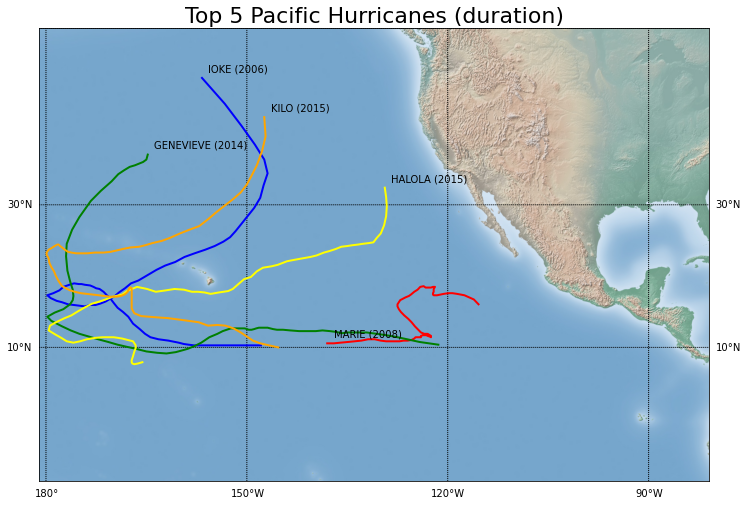

In [18]:
n = 5 # Number of hurricanes

# Graph the trajectories of the longest hurricanes (the ones that traveled the most)
plt.figure(figsize=(12,9))
m = Basemap(llcrnrlon=-181.,llcrnrlat=-10.,urcrnrlon=-81.,urcrnrlat=50.,
            rsphere=(6378137.00,6356752.3142),
            resolution='h',
            projection='merc',
            lat_0=40.,lon_0=-20.,lat_ts=20.)
#m.bluemarble() #Pretty NASA picture
# m.fillcontinents(color='#D3D3D3')

m.shadedrelief() #Plot a translucent relief map 

m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

colors = ['blue','red','green','yellow','orange','lime','pink','purple','cyan','brown']

for i in range(n):
    j = i
    i = p_longest[i]
    year = pacific[i]['Date'].values[0][-4:]
    name = pacific[i]['Time'].values[0].strip()
    lat = pacific[i]["Latitude"][1:].values
    long = -pacific[i]["Longitude"][1:].values # Make sure the longitude
    xpt, ypt = m(long, lat)
    plt.text(xpt[len(lat) - 1]+100000,ypt[len(long) - 1]+100000, f'{name} ({year})', color='k')
    m.plot(xpt, ypt, linewidth=2, color=colors[j], label=f'{name} ({year})')
#     plt.plot(xpt[-1],ypt[-1],'*',color=colors[i-8])
# plt.legend()
    
plt.title('Top 5 Pacific Hurricanes (duration)', fontsize=22)
plt.savefig('pacific_hurricanes')
plt.show()

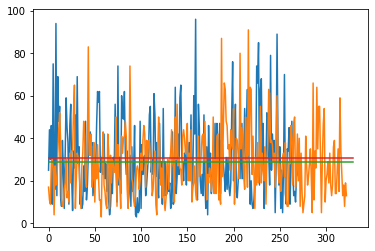

In [171]:
plt.plot([len(a) for a in atlantic])
plt.plot([len(a) for a in pacific])
plt.plot(np.ones(330)*np.mean([len(a) for a in pacific]))
plt.plot(np.ones(330)*np.mean([len(a) for a in atlantic]))